In [2]:
# Qsurface imports
from qsurface.main import create_phenomenological_toric_superoperator, create_phenomenological_weight_3_toric_superoperator,create_phenomenological_weight_4_toric_superoperator, initialize, run, BenchmarkDecoder, run_multiprocess_superoperator


# Interactive plotting imports
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.util.compiler import TypeScript

# Plotting imports
import matplotlib.pyplot as plt

# Math imports
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

# Utilities import
from os import listdir
from os.path import isfile, join
from itertools import permutations
import timeit
import time


%load_ext line_profiler

## Weight-3 Reflection Current

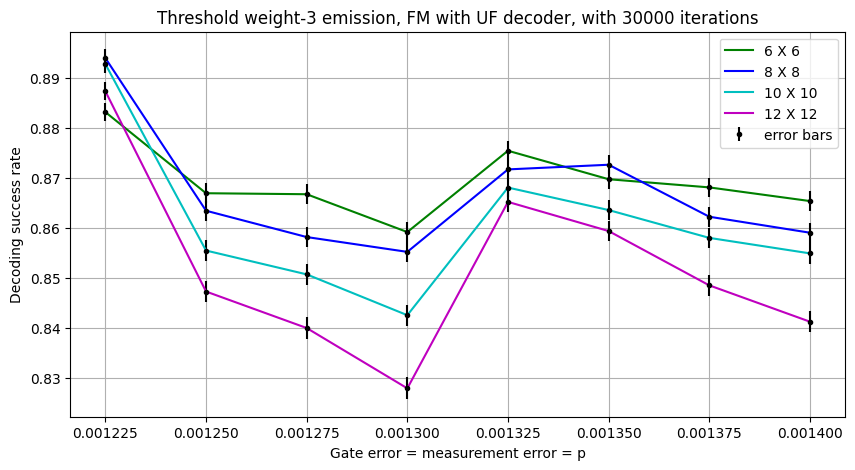

In [14]:
iterations = 30000

# first data first trial
# data = {"(6, 6)":{"0":[0.0005,0.8805],"1":[0.001,0.9021666667],"2":[0.00125,0.8899],"3":[0.0015,0.8828],"4":[0.00175,0.8712666667],"5":[0.002,0.8555333333]},"(8, 8)":{"0":[0.0005,0.8883333333],"1":[0.001,0.9141333333],"2":[0.00125,0.9015333333],"3":[0.0015,0.8870333333],"4":[0.00175,0.8694],"5":[0.002,0.8522]},"(10, 10)":{"0":[0.0005,0.8905333333],"1":[0.001,0.9211333333],"2":[0.00125,0.9063],"3":[0.0015,0.8890666667],"4":[0.00175,0.8681666667],"5":[0.002,0.8481666667]},"(12, 12)":{"0":[0.0005,0.8912666667],"1":[0.001,0.9265666667],"2":[0.00125,0.9094666667],"3":[0.0015,0.8891],"4":[0.00175,0.8639333333],"5":[0.002,0.8402333333]}}

# second data first trial with blossomV
# data = {"(6, 6)":{"0":[0.0005,0.8813666667],"1":[0.001,0.9024],"2":[0.00125,0.8972666667],"3":[0.0015,0.8812333333],"4":[0.00175,0.8690666667],"5":[0.002,0.8572666667]},"(8, 8)":{"0":[0.0005,0.8872],"1":[0.001,0.9156],"2":[0.00125,0.9028666667],"3":[0.0015,0.8878333333],"4":[0.00175,0.8729666667],"5":[0.002,0.8556666667]},"(10, 10)":{"0":[0.0005,0.8903],"1":[0.001,0.9224],"2":[0.00125,0.9032333333],"3":[0.0015,0.892],"4":[0.00175,0.8701333333],"5":[0.002,0.8511666667]},"(12, 12)":{"0":[0.0005,0.8882666667],"1":[0.001,0.9282],"2":[0.00125,0.9076333333],"3":[0.0015,0.8882333333],"4":[0.00175,0.8629],"5":[0.002,0.8433]}}

# after correction!
# data = {"(6, 6)":{"0":[0.0005,0.8525333333],"1":[0.001,0.8799],"2":[0.00125,0.8670666667],"3":[0.0015,0.8544333333],"4":[0.00175,0.8380666667],"5":[0.002,0.8306333333]},"(8, 8)":{"0":[0.0005,0.8389],"1":[0.001,0.8786666667],"2":[0.00125,0.8635666667],"3":[0.0015,0.8420333333],"4":[0.00175,0.8318],"5":[0.002,0.8135333333]},"(10, 10)":{"0":[0.0005,0.8188666667],"1":[0.001,0.8766666667],"2":[0.00125,0.8529333333],"3":[0.0015,0.8347],"4":[0.00175,0.8108],"5":[0.002,0.7883666667]},"(12, 12)":{"0":[0.0005,0.7994],"1":[0.001,0.8660333333],"2":[0.00125,0.8427],"3":[0.0015,0.8170333333],"4":[0.00175,0.7868333333],"5":[0.002,0.7593333333]}}

#new one!
# data = {"(6, 6)":{"0":[0.0005,0.8494666667],"1":[0.001,0.8802333333],"2":[0.00125,0.8683333333],"3":[0.0015,0.8555666667],"4":[0.00175,0.8426666667],"5":[0.002,0.8286666667]},"(8, 8)":{"0":[0.0005,0.8414333333],"1":[0.001,0.8795666667],"2":[0.00125,0.8616333333],"3":[0.0015,0.8456],"4":[0.00175,0.8283333333],"5":[0.002,0.8112333333]},"(10, 10)":{"0":[0.0005,0.8190333333],"1":[0.001,0.8678],"2":[0.00125,0.8537],"3":[0.0015,0.8324],"4":[0.00175,0.8074333333],"5":[0.002,0.7852333333]},"(12, 12)":{"0":[0.0005,0.8008],"1":[0.001,0.8646666667],"2":[0.00125,0.8407],"3":[0.0015,0.8145666667],"4":[0.00175,0.7875],"5":[0.002,0.7576333333]}}

# data for protocol 351 TESTING PHASE FOR WEIGHT 3
# data = {"(6, 6)":{"0":[0.001,0.8828333333],"1":[0.00105,0.8798],"2":[0.0011,0.8671333333],"3":[0.00115,0.8643333333],"4":[0.0012,0.8565333333],"5":[0.00125,0.8514666667],"6":[0.0013,0.8409666667],"7":[0.00135,0.8718666667],"8":[0.0014,0.8679],"9":[0.00145,0.8624]},"(8, 8)":{"0":[0.001,0.8868333333],"1":[0.00105,0.8752666667],"2":[0.0011,0.8656666667],"3":[0.00115,0.8619666667],"4":[0.0012,0.8496],"5":[0.00125,0.8386333333],"6":[0.0013,0.8323],"7":[0.00135,0.8709],"8":[0.0014,0.8626],"9":[0.00145,0.8527]},"(10, 10)":{"0":[0.001,0.8811333333],"1":[0.00105,0.872],"2":[0.0011,0.8617333333],"3":[0.00115,0.8497],"4":[0.0012,0.8378],"5":[0.00125,0.8202],"6":[0.0013,0.8121666667],"7":[0.00135,0.8670666667],"8":[0.0014,0.8536666667],"9":[0.00145,0.8469]},"(12, 12)":{"0":[0.001,0.8804666667],"1":[0.00105,0.8657333333],"2":[0.0011,0.8497666667],"3":[0.00115,0.8332],"4":[0.0012,0.8236],"5":[0.00125,0.8098333333],"6":[0.0013,0.7896333333],"7":[0.00135,0.8613],"8":[0.0014,0.8488333333],"9":[0.00145,0.8318333333]}}

# data for protocol 351 TESTING AFTER REMOVING IDLING NOISE TO CHECK THE TREND
# data = {"(6, 6)":{"0":[0.001,0.9685],"1":[0.00105,0.9649333333],"2":[0.0011,0.9628],"3":[0.00115,0.9581],"4":[0.0012,0.9565666667],"5":[0.00125,0.9483666667],"6":[0.0013,0.9454333333],"7":[0.00135,0.94],"8":[0.0014,0.9353333333],"9":[0.00145,0.9300333333]},"(8, 8)":{"0":[0.001,0.9784333333],"1":[0.00105,0.9784666667],"2":[0.0011,0.9739333333],"3":[0.00115,0.9704666667],"4":[0.0012,0.9671333333],"5":[0.00125,0.9658],"6":[0.0013,0.9582333333],"7":[0.00135,0.9551666667],"8":[0.0014,0.9513666667],"9":[0.00145,0.9479]},"(10, 10)":{"0":[0.001,0.9875],"1":[0.00105,0.9834],"2":[0.0011,0.9820666667],"3":[0.00115,0.9803666667],"4":[0.0012,0.9761333333],"5":[0.00125,0.9731],"6":[0.0013,0.9709333333],"7":[0.00135,0.9652],"8":[0.0014,0.9603666667],"9":[0.00145,0.9566]},"(12, 12)":{"0":[0.001,0.9909333333],"1":[0.00105,0.9898333333],"2":[0.0011,0.9883333333],"3":[0.00115,0.9860666667],"4":[0.0012,0.9836333333],"5":[0.00125,0.9806666667],"6":[0.0013,0.9765333333],"7":[0.00135,0.9722],"8":[0.0014,0.9670333333],"9":[0.00145,0.9633333333]}}

# data for protocol 351 TESTING WITH ONLY IDLING NOISE
# data = {"(6, 6)":{"0":[0.001,0.9922333333],"1":[0.00105,0.9927666667],"2":[0.0011,0.9923],"3":[0.00115,0.9928333333],"4":[0.0012,0.9928333333],"5":[0.00125,0.9928333333],"6":[0.0013,0.9930666667],"7":[0.00135,0.996],"8":[0.0014,0.9964666667],"9":[0.00145,0.9966666667]},"(8, 8)":{"0":[0.001,0.9963333333],"1":[0.00105,0.9966],"2":[0.0011,0.9965],"3":[0.00115,0.9968],"4":[0.0012,0.9969333333],"5":[0.00125,0.9964666667],"6":[0.0013,0.9962666667],"7":[0.00135,0.998],"8":[0.0014,0.9979333333],"9":[0.00145,0.9978666667]},"(10, 10)":{"0":[0.001,0.9978666667],"1":[0.00105,0.9980666667],"2":[0.0011,0.9978666667],"3":[0.00115,0.9980333333],"4":[0.0012,0.9981],"5":[0.00125,0.9978666667],"6":[0.0013,0.9977333333],"7":[0.00135,0.9982666667],"8":[0.0014,0.9983666667],"9":[0.00145,0.9983666667]},"(12, 12)":{"0":[0.001,0.9983666667],"1":[0.00105,0.9983333333],"2":[0.0011,0.9982],"3":[0.00115,0.9983],"4":[0.0012,0.9982666667],"5":[0.00125,0.9982333333],"6":[0.0013,0.9982666667],"7":[0.00135,0.9983333333],"8":[0.0014,0.9983666667],"9":[0.00145,0.9983666667]}}

# data for protocol 351 TESTING AFTER CORRECTION
data = {"(6, 6)":{"0":[0.001225,0.8832333333],"1":[0.00125,0.867],"2":[0.001275,0.8668],"3":[0.0013,0.8592333333],"4":[0.001325,0.8755],"5":[0.00135,0.8698],"6":[0.001375,0.8681666667],"7":[0.0014,0.8654333333]},"(8, 8)":{"0":[0.001225,0.8940333333],"1":[0.00125,0.8635],"2":[0.001275,0.8582333333],"3":[0.0013,0.8552666667],"4":[0.001325,0.8717666667],"5":[0.00135,0.8727],"6":[0.001375,0.8623],"7":[0.0014,0.8591]},"(10, 10)":{"0":[0.001225,0.8928333333],"1":[0.00125,0.8555333333],"2":[0.001275,0.8507666667],"3":[0.0013,0.8426],"4":[0.001325,0.8681333333],"5":[0.00135,0.8636333333],"6":[0.001375,0.8580666667],"7":[0.0014,0.8549666667]},"(12, 12)":{"0":[0.001225,0.8874],"1":[0.00125,0.8473333333],"2":[0.001275,0.8400333333],"3":[0.0013,0.8279666667],"4":[0.001325,0.8652666667],"5":[0.00135,0.8594333333],"6":[0.001375,0.8485666667],"7":[0.0014,0.8413]}}
rates = [rate[0] for rate in list(data["(6, 6)"].values())]


l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=35000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title(f'Threshold weight-3 emission, FM with UF decoder, with {iterations} iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')

plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_3_reflection_current_threshold.pdf')
plt.show()

## Weight-4 Reflection Current

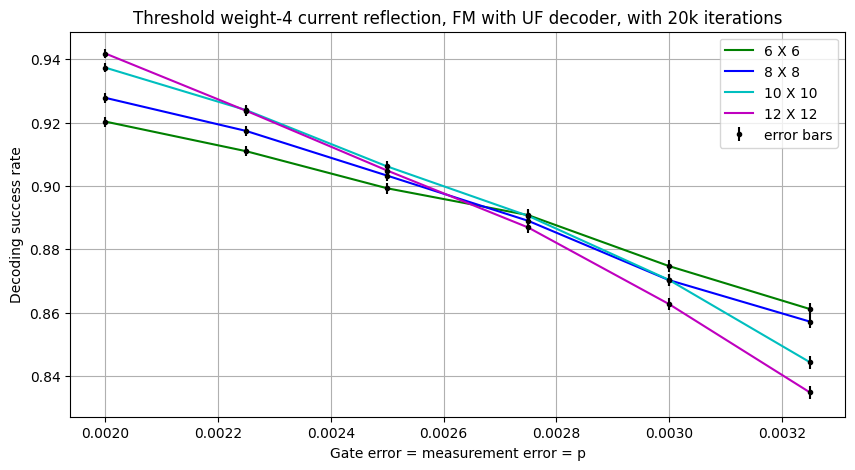

In [4]:
iterations = 30000

# first data first trial
# data = {"(6, 6)":{"0":[0.0005,0.9622],"1":[0.001,0.9507333333],"2":[0.00125,0.9457333333],"3":[0.0015,0.9362333333],"4":[0.00175,0.9285666667],"5":[0.002,0.9189]},"(8, 8)":{"0":[0.0005,0.9732333333],"1":[0.001,0.9631],"2":[0.00125,0.9567333333],"3":[0.0015,0.9478],"4":[0.00175,0.9414333333],"5":[0.002,0.9302666667]},"(10, 10)":{"0":[0.0005,0.9827666667],"1":[0.001,0.9741],"2":[0.00125,0.9667],"3":[0.0015,0.9563666667],"4":[0.00175,0.9476],"5":[0.002,0.9326666667]},"(12, 12)":{"0":[0.0005,0.9877333333],"1":[0.001,0.9787],"2":[0.00125,0.972],"3":[0.0015,0.9621],"4":[0.00175,0.9545666667],"5":[0.002,0.9400333333]}}
# second data better regime
data = {"(6, 6)":{"0":[0.002,0.9203],"1":[0.00225,0.9109333333],"2":[0.0025,0.8992333333],"3":[0.00275,0.8907666667],"4":[0.003,0.8746666667],"5":[0.00325,0.8611]},"(8, 8)":{"0":[0.002,0.9278],"1":[0.00225,0.9173333333],"2":[0.0025,0.9032333333],"3":[0.00275,0.8889666667],"4":[0.003,0.8702333333],"5":[0.00325,0.8571333333]},"(10, 10)":{"0":[0.002,0.9373333333],"1":[0.00225,0.9239],"2":[0.0025,0.9061333333],"3":[0.00275,0.8905333333],"4":[0.003,0.8703],"5":[0.00325,0.8443]},"(12, 12)":{"0":[0.002,0.9418],"1":[0.00225,0.9237],"2":[0.0025,0.9048333333],"3":[0.00275,0.8868666667],"4":[0.003,0.8626666667],"5":[0.00325,0.8347666667]}}

# WT3 data into wt4 just to test!
# data = {"(6, 6)":{"0":[0.0005,0.9951],"1":[0.001,0.9940666667],"2":[0.00125,0.9918333333],"3":[0.0015,0.9896666667],"4":[0.00175,0.9885],"5":[0.002,0.9857666667]},"(8, 8)":{"0":[0.0005,0.998],"1":[0.001,0.9972666667],"2":[0.00125,0.9962],"3":[0.0015,0.9959],"4":[0.00175,0.9943],"5":[0.002,0.9932666667]},"(10, 10)":{"0":[0.0005,0.9982333333],"1":[0.001,0.998],"2":[0.00125,0.9976],"3":[0.0015,0.9973],"4":[0.00175,0.9969333333],"5":[0.002,0.9958333333]},"(12, 12)":{"0":[0.0005,0.9982666667],"1":[0.001,0.9983],"2":[0.00125,0.9982666667],"3":[0.0015,0.9980333333],"4":[0.00175,0.9978],"5":[0.002,0.9974]}}
rates = [rate[0] for rate in list(data["(6, 6)"].values())]

l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=35000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('Threshold weight-4 current reflection, FM with UF decoder, with 20k iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')


plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_4_reflection_current_threshold.pdf')
plt.show()

## Weight-4 Reflection Near Future

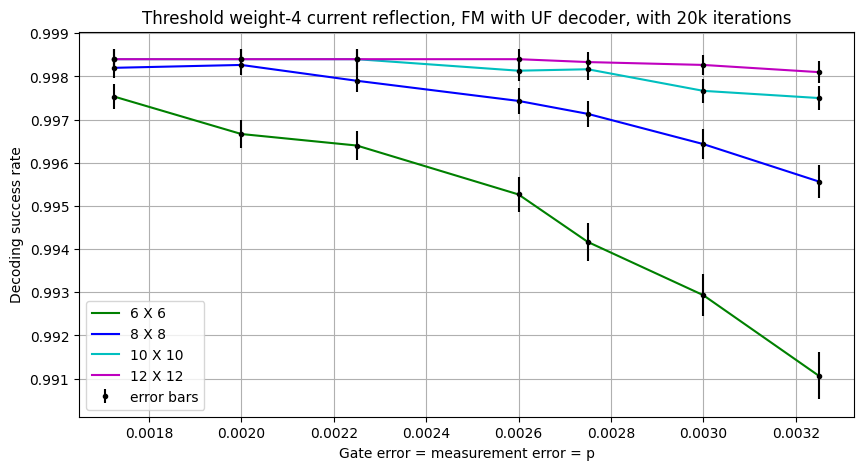

In [32]:
iterations = 30000

# first data first trial

data = {"(6, 6)":{"0":[0.001725,0.9975333333],"1":[0.002,0.9966666667],"2":[0.00225,0.9964],"3":[0.0026,0.9952666667],"4":[0.00275,0.9941666667],"5":[0.003,0.9929333333],"6":[0.00325,0.9910666667]},"(8, 8)":{"0":[0.001725,0.9982],"1":[0.002,0.9982666667],"2":[0.00225,0.9979],"3":[0.0026,0.9974333333],"4":[0.00275,0.9971333333],"5":[0.003,0.9964333333],"6":[0.00325,0.9955666667]},"(10, 10)":{"0":[0.001725,0.9984],"1":[0.002,0.9984],"2":[0.00225,0.9984],"3":[0.0026,0.9981333333],"4":[0.00275,0.9981666667],"5":[0.003,0.9976666667],"6":[0.00325,0.9975]},"(12, 12)":{"0":[0.001725,0.9984],"1":[0.002,0.9984],"2":[0.00225,0.9984],"3":[0.0026,0.9984],"4":[0.00275,0.9983333333],"5":[0.003,0.9982666667],"6":[0.00325,0.9981]}}
# data = {"(6, 6)":{"0":[0.00275,0.9946333333],"1":[0.003,0.9921],"2":[0.00325,0.9917],"3":[0.0035,0.9892666667],"4":[0.00375,0.9863666667],"5":[0.004,0.9842],"6":[0.00425,0.9816333333],"7":[0.0045,0.9773]},"(8, 8)":{"0":[0.00275,0.9972],"1":[0.003,0.9965333333],"2":[0.00325,0.9960333333],"3":[0.0035,0.9947666667],"4":[0.00375,0.9943],"5":[0.004,0.9913333333],"6":[0.00425,0.9893666667],"7":[0.0045,0.9865333333]},"(10, 10)":{"0":[0.00275,0.9981333333],"1":[0.003,0.9978],"2":[0.00325,0.9974666667],"3":[0.0035,0.9966666667],"4":[0.00375,0.9956333333],"5":[0.004,0.9951],"6":[0.00425,0.9947666667],"7":[0.0045,0.9919333333]},"(12, 12)":{"0":[0.00275,0.9983333333],"1":[0.003,0.9983666667],"2":[0.00325,0.9981],"3":[0.0035,0.9979],"4":[0.00375,0.9976666667],"5":[0.004,0.9973],"6":[0.00425,0.9959666667],"7":[0.0045,0.9949]}}

rates = [rate[0] for rate in list(data["(6, 6)"].values())]

l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=350000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('Threshold weight-4 current reflection, FM with UF decoder, with 20k iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')


plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_4_reflection_current_threshold.pdf')
plt.show()

## Weight-4 Cavity Carving Coherent Near Future

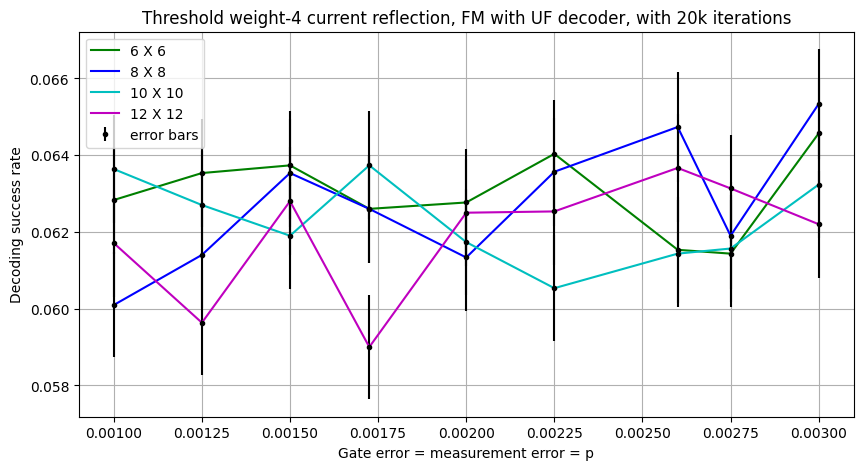

In [27]:
iterations = 30000

# first data first trial


data = {"(6, 6)":{"0":[0.001001,0.0628333333],"1":[0.00125,0.0635333333],"2":[0.0015,0.0637333333],"3":[0.001725,0.0626],"4":[0.002,0.0627666667],"5":[0.00225,0.0640333333],"6":[0.0026,0.0615333333],"7":[0.00275,0.0614333333],"8":[0.003,0.0645666667]},"(8, 8)":{"0":[0.001001,0.0601],"1":[0.00125,0.0614],"2":[0.0015,0.0635333333],"3":[0.001725,0.0626],"4":[0.002,0.0613333333],"5":[0.00225,0.0635666667],"6":[0.0026,0.0647333333],"7":[0.00275,0.0619],"8":[0.003,0.0653333333]},"(10, 10)":{"0":[0.001001,0.0636333333],"1":[0.00125,0.0627],"2":[0.0015,0.0619],"3":[0.001725,0.0637333333],"4":[0.002,0.0617333333],"5":[0.00225,0.0605333333],"6":[0.0026,0.0614333333],"7":[0.00275,0.0615666667],"8":[0.003,0.0632333333]},"(12, 12)":{"0":[0.001001,0.0617],"1":[0.00125,0.0596333333],"2":[0.0015,0.0628],"3":[0.001725,0.059],"4":[0.002,0.0625],"5":[0.00225,0.0625333333],"6":[0.0026,0.0636666667],"7":[0.00275,0.0631333333],"8":[0.003,0.0622]}}
rates = [rate[0] for rate in list(data["(6, 6)"].values())]

l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=350000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('Threshold weight-4 current reflection, FM with UF decoder, with 20k iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')


plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_4_reflection_current_threshold.pdf')
plt.show()